<a href="https://colab.research.google.com/github/jisoo-c/HY23-2/blob/main/HY_230918.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Word Embedding
## sklearn 활용
sklearn: https://scikit-learn.org/stable/

## DTM (Document-Term Matrix)
!problem: sparse representation

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
corpus = [
    'I love you',
    'You love me',
    'I want to marry you ',
]

vector = CountVectorizer()

In [ ]:
print(vector.fit_transform(corpus).toarray())

[[1 0 0 0 0 1]
 [1 0 1 0 0 1]
 [0 1 0 1 1 1]]


In [ ]:
print(vector.vocabulary_)

{'love': 0, 'you': 5, 'me': 2, 'want': 4, 'to': 3, 'marry': 1}


## TF-IDF

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidfv = TfidfVectorizer().fit(corpus)

In [ ]:
print(tfidfv.transform(corpus).toarray())

[[0.78980693 0.         0.         0.         0.         0.61335554]
 [0.54783215 0.         0.72033345 0.         0.         0.42544054]
 [0.         0.54645401 0.         0.54645401 0.54645401 0.32274454]]


In [ ]:
print(tfidfv.vocabulary_)

{'love': 0, 'you': 5, 'me': 2, 'want': 4, 'to': 3, 'marry': 1}


## Word2Vec

In [ ]:
from numpy import dot
from numpy.linalg import norm
import re
import urllib.request
import zipfile
from lxml import etree
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
# 데이터 다운로드 (이하: https://wikidocs.net/50739)
urllib.request.urlretrieve("https://raw.githubusercontent.com/ukairia777/tensorflow-nlp-tutorial/main/09.%20Word%20Embedding/dataset/ted_en-20160408.xml", filename="ted_en-20160408.xml")

('ted_en-20160408.xml', <http.client.HTTPMessage at 0x7f58527c4670>)

In [ ]:
#이하 전처리

targetXML = open('ted_en-20160408.xml', 'r', encoding='UTF8')
target_text = etree.parse(targetXML)
parse_text = '\n'.join(target_text.xpath('//content/text()'))
content_text = re.sub(r'\([^)]*\)', '', parse_text)

#문장정제
sent_text = sent_tokenize(content_text)
normalized_text = []
for string in sent_text:
     tokens = re.sub(r"[^a-z0-9]+", " ", string.lower())
     normalized_text.append(tokens)

#단어토큰화
result = [word_tokenize(sentence) for sentence in normalized_text]

In [ ]:
# 샘플 3개만 출력
for line in result[:3]:
    print(line)

['here', 'are', 'two', 'reasons', 'companies', 'fail', 'they', 'only', 'do', 'more', 'of', 'the', 'same', 'or', 'they', 'only', 'do', 'what', 's', 'new']
['to', 'me', 'the', 'real', 'real', 'solution', 'to', 'quality', 'growth', 'is', 'figuring', 'out', 'the', 'balance', 'between', 'two', 'activities', 'exploration', 'and', 'exploitation']
['both', 'are', 'necessary', 'but', 'it', 'can', 'be', 'too', 'much', 'of', 'a', 'good', 'thing']


## Word2Vec gensim 패키지로 돌리기

!gensim: https://radimrehurek.com/gensim/index.html

vector_size = 워드 벡터의 특징 값. 즉, 임베딩 된 벡터의 차원.

window = 컨텍스트 윈도우 크기

min_count = 단어 최소 빈도 수 제한 (빈도가 적은 단어들은 학습하지 않는다.)

workers = 학습을 위한 프로세스 수

sg = 0은 CBOW, 1은 Skip-gram.

In [ ]:
from gensim.models import Word2Vec
from gensim.models import KeyedVectors

model = Word2Vec(sentences=result, vector_size=100, window=5, min_count=5, workers=4, sg=0)

In [ ]:
model_result = model.wv.most_similar("dog")
print(model_result)

[('chair', 0.791040301322937), ('cat', 0.7859301567077637), ('leg', 0.780095636844635), ('hat', 0.7513631582260132), ('mom', 0.743981659412384), ('doctor', 0.7394374012947083), ('nose', 0.7362499237060547), ('arm', 0.7342106699943542), ('pants', 0.7207270264625549), ('wrist', 0.7195460796356201)]


In [ ]:
model.wv.save_word2vec_format('eng_w2v') # 모델 저장
loaded_model = KeyedVectors.load_word2vec_format("eng_w2v") # 모델 로드

In [ ]:
model_result = model.wv.most_similar("dog")
print(model_result)

[('chair', 0.791040301322937), ('cat', 0.7859301567077637), ('leg', 0.780095636844635), ('hat', 0.7513631582260132), ('mom', 0.743981659412384), ('doctor', 0.7394374012947083), ('nose', 0.7362499237060547), ('arm', 0.7342106699943542), ('pants', 0.7207270264625549), ('wrist', 0.7195460796356201)]


## 한국어 네이버 영화 리뷰 코퍼스 구축 & Word2Vec

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import urllib.request
from gensim.models.word2vec import Word2Vec

!pip install konlpy
from konlpy.tag import Okt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 44.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 465.3/465.3 kB 38.3 MB/s eta 0:00:00


In [ ]:
urllib.request.urlretrieve("https://raw.githubusercontent.com/e9t/nsmc/master/ratings.txt", filename="ratings.txt")

('ratings.txt', <http.client.HTTPMessage at 0x7f583d6930a0>)

In [ ]:
train_data = pd.read_table('ratings.txt') #데이터 로드
train_data[:5] # 상위 5개 출력
print(len(train_data)) # 리뷰 개수 출력

200000


In [ ]:
print(train_data.isnull().values.any()) # NULL 값 존재 유무 확인

True


In [ ]:
train_data = train_data.dropna(how = 'any') # Null 값이 존재하는 행 제거
print(train_data.isnull().values.any()) # Null 값이 존재하는지 확인

False


In [ ]:
print(len(train_data)) # Null 값 제거 후 리뷰 개수 출력

199992


In [ ]:
# 전처리
train_data['document'] = train_data['document'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")
stopwords = ['의','가','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','하다']

okt = Okt()
from tqdm import tqdm
tokenized_data = []
for sentence in tqdm(train_data['document']):
    tokenized_sentence = okt.morphs(sentence, stem=True) # 토큰화
    stopwords_removed_sentence = [word for word in tokenized_sentence if not word in stopwords] # 불용어 제거
    tokenized_data.append(stopwords_removed_sentence)

<ipython-input-58-bbb827d52782>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  train_data['document'] = train_data['document'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")
100%|██████████| 199992/199992 [26:34<00:00, 125.43it/s]


리뷰의 최대 길이 : 72
리뷰의 평균 길이 : 10.716703668146726


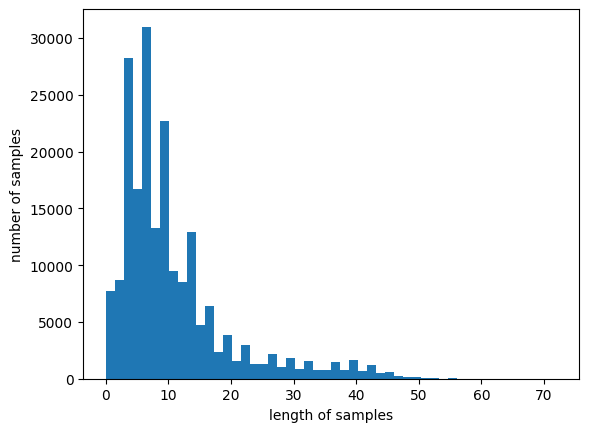

In [ ]:
# 리뷰 길이 분포 확인
print('리뷰의 최대 길이 :',max(len(review) for review in tokenized_data))
print('리뷰의 평균 길이 :',sum(map(len, tokenized_data))/len(tokenized_data))
plt.hist([len(review) for review in tokenized_data], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [ ]:
from gensim.models import Word2Vec

model = Word2Vec(sentences = tokenized_data, vector_size = 100, window = 5, min_count = 5, workers = 4, sg = 0)

In [ ]:
# 완성된 임베딩 매트릭스의 크기 확인
model.wv.vectors.shape

(16477, 100)

In [ ]:
print(model.wv.most_similar("황정민"))

[('하정우', 0.8684333562850952), ('한석규', 0.8607354164123535), ('송강호', 0.8601284027099609), ('최민수', 0.8540533185005188), ('신하균', 0.8492719531059265), ('안성기', 0.8456204533576965), ('이나영', 0.8449473977088928), ('엄정화', 0.8429586887359619), ('조니뎁', 0.8398175835609436), ('신현준', 0.8374233245849609)]


그 외 참고: Mikolov의 구글 w2v 페이지 https://code.google.com/archive/p/word2vec/

## [Optional] Pre-trained Word2Vec embedding

In [ ]:
#model download: https://drive.google.com/file/d/0B7XkCwpI5KDYNlNUTTlSS21pQmM/edit
#이하 각자 실습 가능: [참고 https://wikidocs.net/50739]

#Wordnet

##Princeton Univ. Wordnet Info
https://wordnet.princeton.edu/

##Princeton Univ. Wordnet Search
http://wordnetweb.princeton.edu/perl/webwn?s=dog&sub=Search+WordNet&o2=&o0=1&o8=1&o1=1&o7=&o5=&o9=&o6=&o3=&o4=&h=00

##NLTK Wordnet
https://www.nltk.org/howto/wordnet.html

##Korean - Pusan Univ. KorLex (no standard)
http://korlex.pusan.ac.kr/

In [ ]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
from nltk.corpus import wordnet
from nltk.corpus import wordnet as wn

In [ ]:
wn.synsets('dog')

[Synset('dog.n.01'),
 Synset('frump.n.01'),
 Synset('dog.n.03'),
 Synset('cad.n.01'),
 Synset('frank.n.02'),
 Synset('pawl.n.01'),
 Synset('andiron.n.01'),
 Synset('chase.v.01')]

In [ ]:
wn.synsets('dog', pos=wn.VERB)

[Synset('chase.v.01')]

In [ ]:
wn.synset('dog.n.01').definition()

'a member of the genus Canis (probably descended from the common wolf) that has been domesticated by man since prehistoric times; occurs in many breeds'

In [ ]:
wn.synset('dog.n.01').lemmas()

[Lemma('dog.n.01.dog'),
 Lemma('dog.n.01.domestic_dog'),
 Lemma('dog.n.01.Canis_familiaris')]

In [ ]:
wn.synonyms('dog')

[['Canis_familiaris', 'domestic_dog'],
 ['frump'],
 [],
 ['blackguard', 'bounder', 'cad', 'heel', 'hound'],
 ['frank',
  'frankfurter',
  'hot_dog',
  'hotdog',
  'weenie',
  'wiener',
  'wienerwurst'],
 ['click', 'detent', 'pawl'],
 ['andiron', 'dog-iron', 'firedog'],
 ['chase',
  'chase_after',
  'give_chase',
  'go_after',
  'tag',
  'tail',
  'track',
  'trail']]

In [ ]:
dog = wn.synset('dog.n.01')
dog.hypernyms()

[Synset('canine.n.02'), Synset('domestic_animal.n.01')]

In [ ]:
dog.hyponyms()

[Synset('basenji.n.01'),
 Synset('corgi.n.01'),
 Synset('cur.n.01'),
 Synset('dalmatian.n.02'),
 Synset('great_pyrenees.n.01'),
 Synset('griffon.n.02'),
 Synset('hunting_dog.n.01'),
 Synset('lapdog.n.01'),
 Synset('leonberg.n.01'),
 Synset('mexican_hairless.n.01'),
 Synset('newfoundland.n.01'),
 Synset('pooch.n.01'),
 Synset('poodle.n.01'),
 Synset('pug.n.01'),
 Synset('puppy.n.01'),
 Synset('spitz.n.01'),
 Synset('toy_dog.n.01'),
 Synset('working_dog.n.01')]

In [ ]:
#언어 데이터셋
#확인
wn.langs()

['eng']

In [ ]:
#similarity --> "synset1.path_similarity(synset2)"
dog = wn.synset('dog.n.01')
cat = wn.synset('cat.n.01')
dog.path_similarity(cat)

0.2

In [ ]:
hit = wn.synset('hit.v.01')
slap = wn.synset('slap.v.01')
hit.path_similarity(slap)

0.14285714285714285

In [ ]:
for synset in list(wn.all_synsets('n'))[:10]:
    print(synset)

Synset('entity.n.01')
Synset('physical_entity.n.01')
Synset('abstraction.n.06')
Synset('thing.n.12')
Synset('object.n.01')
Synset('whole.n.02')
Synset('congener.n.03')
Synset('living_thing.n.01')
Synset('organism.n.01')
Synset('benthos.n.02')
